# Importing Liberaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Making the data matrix

In [3]:
X = np.array([
    [8, 12, 18, 22],
    [10, 15, 19, 21],
    [7, 11, 17, 23],
    [9, 14, 20, 20],
    [8, 13, 18, 21]
])

In [4]:
X

array([[ 8, 12, 18, 22],
       [10, 15, 19, 21],
       [ 7, 11, 17, 23],
       [ 9, 14, 20, 20],
       [ 8, 13, 18, 21]])

### Calculating mean of each column

In [5]:
means = np.mean(X, axis=0)


In [6]:
means

array([ 8.4, 13. , 18.4, 21.4])

# Centralizing the Matrix

In [7]:
X_centered = X - means

In [8]:
X_centered

array([[-0.4, -1. , -0.4,  0.6],
       [ 1.6,  2. ,  0.6, -0.4],
       [-1.4, -2. , -1.4,  1.6],
       [ 0.6,  1. ,  1.6, -1.4],
       [-0.4,  0. , -0.4, -0.4]])

## Finding Co Variance matrix

In [9]:
cov_matrix = np.cov(X_centered, rowvar=False)


In [10]:
cov_matrix

array([[ 1.3 ,  1.75,  1.05, -0.95],
       [ 1.75,  2.5 ,  1.5 , -1.5 ],
       [ 1.05,  1.5 ,  1.3 , -1.2 ],
       [-0.95, -1.5 , -1.2 ,  1.3 ]])

# Finding Eigen Values and Eigen Vectors

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [12]:
eigenvalues

array([5.7493436 , 0.51306487, 0.0081867 , 0.12940483])

In [13]:
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


In [14]:
eigenvalues

array([5.7493436 , 0.51306487, 0.12940483, 0.0081867 ])

In [15]:
eigenvectors

array([[ 0.45008561,  0.47417171,  0.35492901,  0.66828851],
       [ 0.64533689,  0.40979753, -0.36406439, -0.53203703],
       [ 0.44040734, -0.49061711,  0.68416273, -0.3118615 ],
       [-0.4324403 ,  0.60541063,  0.52288037, -0.41601619]])

In [16]:
W = eigenvectors[:, :2]  # shape (4, 2)
X_2d = X_centered.dot(W) # shape (5, 2)

## Ploting the 2D Scatter plot for principal Component 

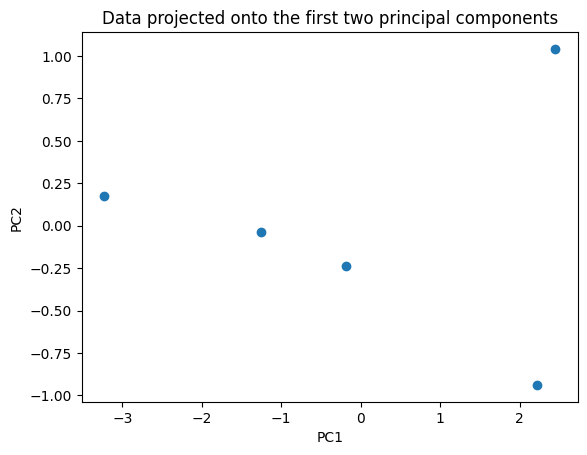

In [17]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data projected onto the first two principal components")
plt.show()

In [18]:
total_variance = np.sum(eigenvalues)
variance_ratio = np.cumsum(eigenvalues) / total_variance
k = np.searchsorted(variance_ratio, 0.90) + 1

In [19]:
print("Eigenvalues:", eigenvalues)
print("Number of components to reach 90% variance:", k)

Eigenvalues: [5.7493436  0.51306487 0.12940483 0.0081867 ]
Number of components to reach 90% variance: 2
